# Base de dados do Titanic

Essa base de dados pode ser obtida no Kaggle, no endereço: 
[www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

### DESCRIÇÃO DOS ATRIBUTOS:


*   ```survival``` --  Sobrevivente (0 = Não; 1 = Sim)
*   ```pclass``` --  Classe do passageiro (1 = 1a classe; 2 = 2a classe; 3 = 3a classe)
*   ```name``` --  Nome (str)
*   ```sex``` --  Sexo (male; female)
*   ```age``` --  Idade (numérica)
*   ```sibsp``` --  Número de irmãos/conjuges à bordo
*   ```parch``` --  Número de pais/filhos à bordo
*   ```ticket``` --  Número da passagem
*   ```fare``` --  Tarifa do passageiro
*   ```cabin``` --  Cabine
*   ```embarked``` --  Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

### UPLOAD DE ARQUIVO LOCAL:

Para fazer o upload de bases de dados, deve-se usar o objeto ```files``` do pacote ```goggle.colab```.

Deve-se fazer o upload do arquivo "train.csv" disponível na pasta "Datasets\Titanic".

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

titanic_train = pd.read_csv('./DBs/train.csv')

In [3]:
np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

In [4]:
print(titanic_train.shape)
print(titanic_train.keys())
print(titanic_train.dtypes)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print(titanic_train.describe(),'\n')

categ = titanic_train.dtypes[titanic_train.dtypes == 'object'].index

print(titanic_train[categ].describe())

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33 

                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


In [6]:
del titanic_train['PassengerId']
del titanic_train['Ticket']

In [7]:
titanic_train.shape

(891, 10)

In [8]:
new_survived = pd.Categorical(titanic_train['Survived'])
new_survived = new_survived.rename_categories(["Morreu","Sobreviveu"])
titanic_train['Survived'] = new_survived

new_Pclass = pd.Categorical(titanic_train['Pclass'])
new_Pclass = new_Pclass.rename_categories(["1Classe","2Classe","3Classe"])
titanic_train['Pclass'] = new_Pclass

In [9]:
categ = titanic_train.dtypes[titanic_train.dtypes == 'category'].index

print(titanic_train[categ].describe())

       Survived   Pclass
count       891      891
unique        2        3
top      Morreu  3Classe
freq        549      491


In [10]:
char_cabin = titanic_train['Cabin'].astype(str)

new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train['Cabin'] = new_cabin

print(titanic_train['Cabin'].unique())

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

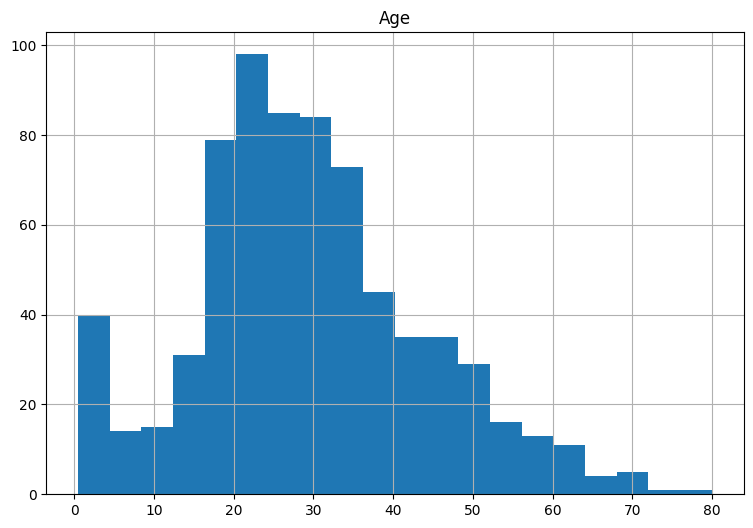

In [12]:
titanic_train.hist(column='Age', figsize=(9, 6), bins=20)

          Age   SibSp   Parch    Fare
count  891.00  891.00  891.00  891.00
mean    29.36    0.52    0.38   32.20
std     13.02    1.10    0.81   49.69
min      0.42    0.00    0.00    0.00
25%     22.00    0.00    0.00    7.91
50%     28.00    0.00    0.00   14.45
75%     35.00    1.00    0.00   31.00
max     80.00    8.00    6.00  512.33


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

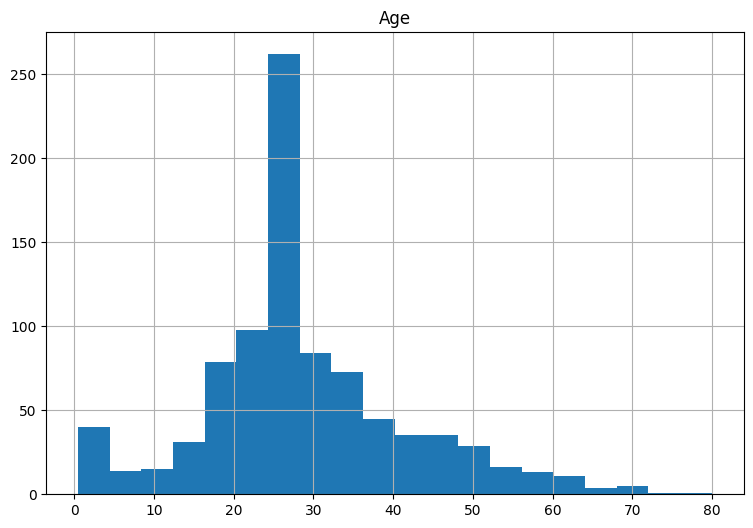

In [15]:
mediana = np.median([el for el in titanic_train['Age']
                    if (np.isnan(el) == False)])
new_age = np.where(titanic_train['Age'].isnull(),
                   mediana, titanic_train['Age'])
titanic_train['Age'] = new_age

print(titanic_train.describe())

titanic_train.hist(column='Age', figsize=(9, 6), bins=20)

       Survived   Pclass                                Name     Sex   Age  \
258  Sobreviveu  1Classe                    Ward, Miss. Anna  female  35.0   
679  Sobreviveu  1Classe  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737  Sobreviveu  1Classe              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Fare Cabin Embarked  
258      0      0  512.33     n        C  
679      0      1  512.33     B        C  
737      0      0  512.33     B        C  


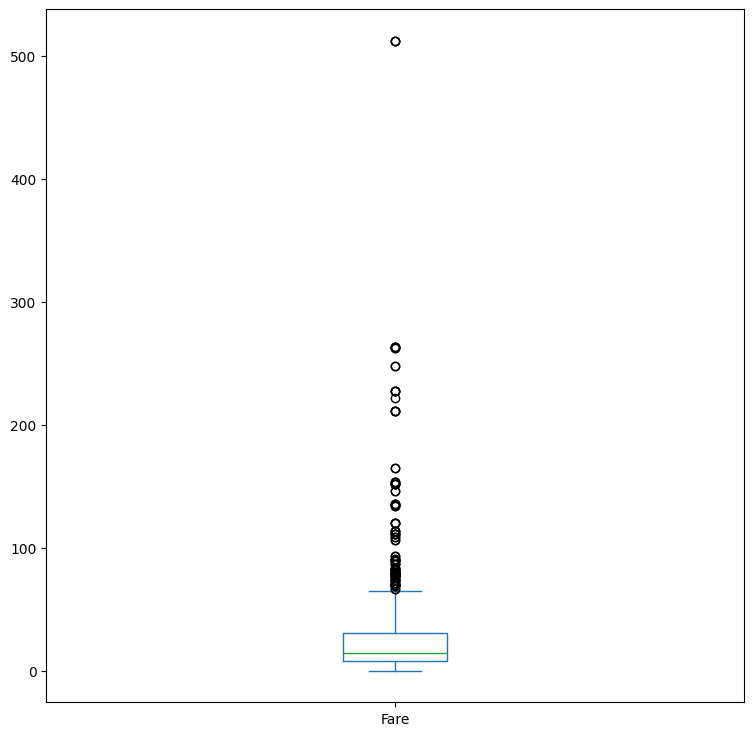

In [17]:
titanic_train['Fare'].plot(kind='box', figsize=(9, 9))

index = np.where(titanic_train['Fare'] == max(titanic_train['Fare']))

print(titanic_train.loc[index])

In [19]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']

most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))

print(titanic_train.loc[most_family])

    Survived   Pclass                               Name     Sex   Age  SibSp  \
159   Morreu  3Classe         Sage, Master. Thomas Henry    male  28.0      8   
180   Morreu  3Classe       Sage, Miss. Constance Gladys  female  28.0      8   
201   Morreu  3Classe                Sage, Mr. Frederick    male  28.0      8   
324   Morreu  3Classe           Sage, Mr. George John Jr    male  28.0      8   
792   Morreu  3Classe            Sage, Miss. Stella Anna  female  28.0      8   
846   Morreu  3Classe           Sage, Mr. Douglas Bullen    male  28.0      8   
863   Morreu  3Classe  Sage, Miss. Dorothy Edith "Dolly"  female  28.0      8   

     Parch   Fare Cabin Embarked  Family  
159      2  69.55     n        S      10  
180      2  69.55     n        S      10  
201      2  69.55     n        S      10  
324      2  69.55     n        S      10  
792      2  69.55     n        S      10  
846      2  69.55     n        S      10  
863      2  69.55     n        S      10  


In [22]:
int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
        SibSp  Parch  Family
SibSp    1.00   0.41    0.89
Parch    0.41   1.00    0.78
Family   0.89   0.78    1.00


In [26]:
gazola = pd.read_excel('./DBs/Gazola_dados_apartamento_resumo.xls', sheet_name=1)

In [28]:
print(gazola.shape)
print(gazola.describe())
print(gazola.dtypes)

(397, 14)
       imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
25%    100.00    1.00     2.00     2.00    2.00    5.00    1.00    2.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
75%    298.00    2.00     4.00     2.00    2.00    7.00    2.00    2.00   
max    397.00    2.00     4.00     3.00    2.00   11.00    3.00    3.00   

         Dorm   Idade  Energia   Artot     Cub   Preço($)  
count  397.00  397.00   397.00  397.00  397.00     397.00  
mean     2.16    7.82   164.60  150.39    1.19   44024.67  
std      0.51    5.86    29.02   84.75    0.36   37585.95  
min      1.00    2.00    86.00   25.93    0.55    4130.62  
25%      2.00 